# Understanding Descriptive Statistics

Import the necessary libraries here:

In [67]:
# Libraries
import os

import pandas as pd
import numpy as np
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [68]:
# your code here
df = pd.DataFrame(random.choices(range(1, 7), k=10), columns=["throw"])
df

,throw
0,2
1,3
2,6
3,3
4,5
5,3
6,4
7,4
8,6
9,2


#### 2.- Plot the results sorted by value.

In [69]:
# your code here
df.sort_values("throw")

,throw
0,2
9,2
1,3
3,3
5,3
6,4
7,4
4,5
2,6
8,6


#### 3.- Calculate the frequency distribution and plot it.

In [70]:
# your code here
count = df["throw"].value_counts(sort=False)

In [71]:
count

2    2
3    3
4    2
5    1
6    2
Name: throw, dtype: int64

'\nyour comments here\n'

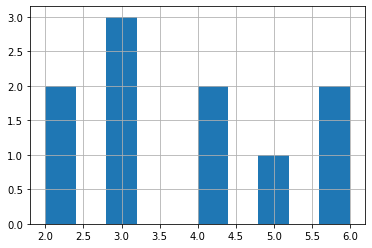

In [111]:
df["throw"].hist()
"""
your comments here
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [73]:
# your code here
def get_mean(s):
    return s.sum() / s.count()
get_mean(df["throw"])

3.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [74]:
# your code here
def freq_mean(x):
    return sum([item * x[item] for item in x.index]) / sum(x)
freq_mean(count)

3.8

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [75]:
a = pd.DataFrame(random.choices(range(1, 7), k=10), columns=["throw"])

In [76]:
a.sort_values("throw").reset_index(drop=True)

,throw
0,1
1,1
2,1
3,2
4,2
5,2
6,2
7,3
8,4
9,6


In [145]:
# your code here
def get_median(x, col, perc):
    length = len(x)
    half = (length / 2)
    x = x.sort_values(col).reset_index(drop=True)
    
    # determine median
    if length % 2 != 0:
        median =  x.iloc[int(half-0.5)]
    else:
        median = (x.iloc[int(half-1)]
                  + x.iloc[int(half)]) / 2
    
    # Using round will give ceiling if length of x is uneven
    if perc == 25:
        return get_median(x.loc[:round(half - 1.5)], col, 50)
    elif perc == 75:
        return get_median(x.loc[int(half + 0.5):], col, 50)
    return median

print(float(get_median(a, "throw", 50)))

2.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [142]:
# your code here
p25 = float(get_median(a, "throw", 25))
p75 = float(get_median(a, "throw", 75))
print(p25)
print(p75)

1.0
3.0


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [79]:
# your code here
roll = pd.read_csv(os.path.join("..", "data", "roll_the_dice_hundred.csv"), index_col=0)

In [80]:
print(roll.shape)
roll.head(10)

(100, 2)


,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
5,5,5
6,6,2
7,7,2
8,8,4
9,9,1


In [81]:
"""
2 columns, with the value for each roll. 100 rolls
"""

'\n2 columns, with the value for each roll. 100 rolls\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [104]:
# your code here
get_mean(roll["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [105]:
# your code here
roll["value"].value_counts(sort=False)

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

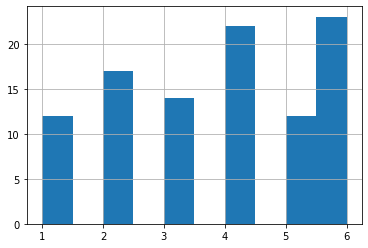

In [114]:
# your code here
roll["value"].hist()

In [85]:
"""
There are more rolls in the higher half, thus the mean is > median.
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [116]:
# your code here
roll = pd.read_csv(os.path.join("..", "data", "roll_the_dice_thousand.csv"), index_col=0)
roll["value"].describe()

count    1000.000000
mean        3.447000
std         1.711175
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: value, dtype: float64

<AxesSubplot:>

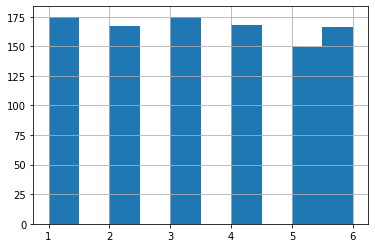

In [117]:
roll["value"].hist()

In [87]:
"""
The distribution is more even. The bigger sample is more true to reality.
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [118]:
# your code here
ages = pd.read_csv(os.path.join("..", "data", "ages_population.csv"))
ages.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


observation
1.0            2
2.0            2
4.0            1
5.0            2
6.0            2
              ..
69.0           1
70.0           1
71.0           1
73.0           1
82.0           1
Length: 72, dtype: int64

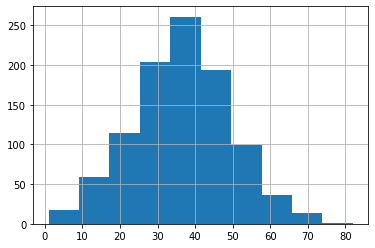

In [127]:
ages["observation"].hist()
ages.value_counts(sort=False)

In [ ]:
# mean probably around 30-31 and sd dev around 10

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [121]:
# your code here
ages["observation"].describe()

count    1000.0000
mean       36.5600
std        12.8165
min         1.0000
25%        28.0000
50%        37.0000
75%        45.0000
max        82.0000
Name: observation, dtype: float64

In [90]:
"""
Both are slightly higher
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [122]:
# your code here
ages2 = pd.read_csv(os.path.join("..", "data", "ages_population2.csv"))
ages2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


observation
19.0             3
20.0            13
21.0            17
22.0            35
23.0            41
24.0            78
25.0            98
26.0           120
27.0           125
28.0           139
29.0           115
30.0            90
31.0            61
32.0            31
33.0            22
34.0             7
35.0             3
36.0             2
dtype: int64

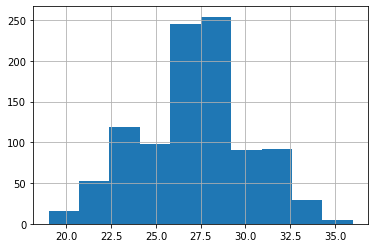

In [126]:
ages2["observation"].hist()
ages2.value_counts(sort=False)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [92]:
"""
less spread, focused around median
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [128]:
# your code here
ages2["observation"].describe()

count    1000.000000
mean       27.155000
std         2.969814
min        19.000000
25%        25.000000
50%        27.000000
75%        29.000000
max        36.000000
Name: observation, dtype: float64

In [94]:
"""
the st dev is very small compared to the other file. 
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [129]:
# your code here
ages3 = pd.read_csv(os.path.join("..", "data", "ages_population3.csv"))
ages3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


observation
1.0            1
2.0            2
4.0            2
5.0            1
7.0            1
              ..
73.0           6
74.0           6
75.0           2
76.0           1
77.0           2
Length: 75, dtype: int64

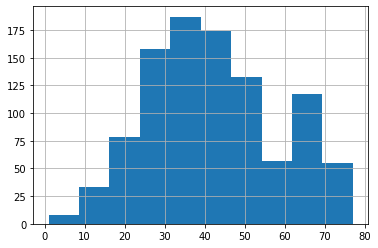

In [130]:
ages3["observation"].hist()
ages3.value_counts(sort=False)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [131]:
# your code here
ages3["observation"].describe()

count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64

In [97]:
"""
The distribution is skewed to the right. The st dev / spread is much higher. A lot of outliers
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [147]:
# your code here
print(f"25: {float(get_median(ages3, 'observation', 25))}")
print(f"50: {float(get_median(ages3, 'observation', 50))}")
print(f"75: {float(get_median(ages3, 'observation', 75))}")

25: 30.0
50: 40.0
75: 53.0


In [99]:
"""
it differs by about 2
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [100]:
# your code here

In [101]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [102]:
# your code here

In [103]:
"""
your comments here
"""

'\nyour comments here\n'